In [1]:
from dynamics import *
import numpy as np
import pandas as pd

file_path   = 'bvolmatrix.xlsx'
sheet       = 'STRADDLE'
sheetf      = 'STRIKE'
df          = pd.read_excel(file_path, sheet_name=sheet,header=None)
dff         = pd.read_excel(file_path, sheet_name=sheetf,header=None)
straddlesobs       = pd.DataFrame(df[[x for x in np.arange(4,16)]][3:22])
strikes            = pd.DataFrame(dff[[x for x in np.arange(4,16)]][3:22])
straddlesobs.index     = df[1][3:22].values
strikes.index          = dff[1][3:22].values
straddlesobs.index.name='Expiry'
strikes.index.name     ='Expiry' 
straddlesobs.columns   = [int(x) for x in df.iloc[1][4:16].values]
strikes.columns        = [int(x) for x in dff.iloc[1][4:16].values]
# straddlesobs
sheeta      = 'ARTICLE'
dfff        = pd.read_excel(file_path, sheet_name=sheeta,header=None)
articleobs  = dfff[[x for x in np.arange(4,17)]][3:17]/10000
articleobs.index = dfff[1][3:17].values
articleobs.index.name = 'Expiry'
articleobs.columns = [int(x) for x in dfff.iloc[1][4:17].values]

straddlesobs


,12,24,36,48,60,84,120,144,180,240,300,360
Expiry,,,,,,,,,,,,
1,0.003793,0.004426,0.004218,0.004022,0.003768,0.003497,0.003077,0.003031,0.002959,0.002844,0.002753,0.002665
3,0.006218,0.006954,0.006732,0.006361,0.006015,0.005639,0.005075,0.005012,0.004911,0.004756,0.004641,0.004536
6,0.008220,0.008752,0.008577,0.008297,0.007992,0.007545,0.006835,0.006745,0.006599,0.006398,0.006275,0.006127
9,0.009634,0.010058,0.009857,0.009570,0.009315,0.008894,0.008134,0.008034,0.007868,0.007610,0.007476,0.007286
12,0.010752,0.011071,0.010830,0.010552,0.010277,0.009871,0.009192,0.009070,0.008867,0.008497,0.008346,0.008174
24,0.013589,0.013703,0.013483,0.013296,0.013149,0.012856,0.012383,0.012164,0.011795,0.011363,0.011125,0.010977
36,0.015670,0.015721,0.015569,0.015322,0.015101,0.014816,0.014332,0.014066,0.013601,0.013090,0.012865,0.012612
48,0.017333,0.017410,0.017124,0.016893,0.016684,0.016325,0.015782,0.015441,0.014911,0.014327,0.014022,0.013681
60,0.018740,0.018732,0.018434,0.018121,0.017847,0.017445,0.016872,0.016475,0.015902,0.015254,0.014865,0.014487


In [11]:
from dynamics import *
from Vasicek import *
def VasicekOptimizer(initial, mean,reversion,volatility, observedP, observedK):
    straddleVasi = observedP.copy()
    optVasi = Vasicek(initial=initial, mean=mean, reversion=reversion, volatility=volatility)
    # optVasi = Vasicek(initial=initial, mean=0.02, reversion=0.95, volatility=volatility)
    for expiry in observedP.index:
        # Expiry first
        # Getting the right expiry and converting to years
        
        for tenor in observedP.columns:
            # print(expiry,tenor)
            # Creating tenor legs
            T = np.arange(expiry/12, expiry/12+tenor/12+0.5, 0.5)
            S = np.arange(expiry/12, expiry/12+tenor/12+1)
            # Finding the ATM fixed rate
            K = observedK[tenor].loc[expiry]/100
            
            #Calculating the payer and receiver swpt price
            # print(f'T:{T}, S:{S}')
            p = optVasi.swaptionSC(0,expiry/12, fixedSchedule=S, floatingSchedule=T, fixedRate=K, payer=True)
            r = optVasi.swaptionSC(0,expiry/12, fixedSchedule=S, floatingSchedule=T, fixedRate=K, payer=False)
            A = np.array([optVasi.ZCB(Si) for Si in S[1::]]).sum()
            # print(f'Expiry:{expiry}, Tenor:{tenor}, Straddle:{p+r}')
            straddleVasi[tenor].loc[expiry] = (p+r)/A
            
    error = ((straddleVasi/observedP-1)**2).sum().sum()
    # print(f'{error}', end='                                                         \r')
    return error,straddleVasi

In [12]:
#Trying to fit all prices (failing)
from scipy.optimize import minimize, basinhopping
EURIBORFIXMARCH22 = 0.02459103
Nfeval = 0
def callback(xk):
    global Nfeval
    print(f'Eval: {Nfeval}, x={xk}, func: {VasicekOptimizer(initial=0.03071, mean=xk[0], reversion=xk[1], volatility=xk[2],observedP=straddlesobs, observedK=strikes)[0]}')
    Nfeval += 1
    return True
# callback([0.027832947, 0.11874695, 0.019677])

result = minimize(
    # fun = lambda x: VasicekOptimizer(EURIBORFIXMARCH22, x[0], x[1], x[2], observed=straddlesobs)[0],
    fun = lambda x: VasicekOptimizer(EURIBORFIXMARCH22, x[0], x[1], x[2], observedP=straddlesobs, observedK=strikes)[0],
    x0  = [0.06460112, 0.13949636660880768, 0.017793899652989272],
    bounds = [(0.0001,1),(0.0001,1),(0.0001,1)],
    tol = 1e-6,
    method='nelder-mead',
    callback=callback
)

c:\Users\Shark\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Eval: 0, x=[0.05814101 0.14647118 0.01868359], func: 14.425560308876639
Eval: 1, x=[0.05814101 0.14647118 0.01868359], func: 14.425560308876639
Eval: 2, x=[0.05383427 0.14414625 0.01809046], func: 12.831082891684895
Eval: 3, x=[0.04306741 0.14879612 0.02016642], func: 7.761849479843835
Eval: 4, x=[0.03445393 0.1650707  0.01898016], func: 3.9032995476959647
Eval: 5, x=[0.01507359 0.1650707  0.01986985], func: 0.2903687444665176
Eval: 6, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 7, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 8, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 9, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 10, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 11, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 12, x=[0.00789569 0.17514544 0.02125382], func: 0.0029036896760704883
Eval: 13, x=[0.00719793 0.17607244 0.0198

KeyboardInterrupt: 

<AxesSubplot: >

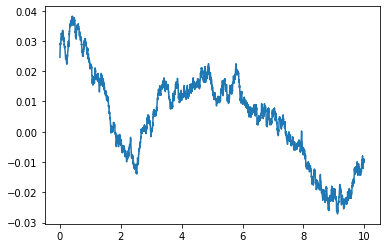

In [13]:
import seaborn as sns
optVasi = Vasicek(initial=EURIBORFIXMARCH22, mean=0.00247416 , reversion=0.05454071, volatility=0.01228772)
time, float = optVasi.create_path(1/365, 10,0,0)
sns.lineplot(x=time, y=float)

In [7]:
import warnings
warnings.filterwarnings('ignore')
#Trying to fit just the first price 1M10Y
from scipy.optimize import minimize, basinhopping
EURIBORFIXMARCH22 = 0.03071
Nfeval = 0
def callback(xk):
    global Nfeval
    print(f'Eval: {Nfeval}, x={xk}, func: {VasicekOptimizer(initial=0.03071, mean=xk[0], reversion=xk[1], volatility=xk[2],observedP=straddlesobs.loc[[12],[120]], observedK=strikes.loc[[12],[120]])[0]}')
    Nfeval += 1
    return True
# callback([0.027832947, 0.11874695, 0.019677])

result = minimize(
    # fun = lambda x: VasicekOptimizer(EURIBORFIXMARCH22, x[0], x[1], x[2], observed=straddlesobs)[0],
    fun = lambda x: VasicekOptimizer(EURIBORFIXMARCH22, x[0], x[1], x[2], observedP=straddlesobs.loc[[12],[120]], observedK=strikes.loc[[12],[120]])[0],
    x0  = [0.06460112, 0.69262944, 0.08495089],
    bounds = [(0.0001,1),(0.0001,1),(0.0001,1)],
    method='nelder-mead',
    callback=callback
)
warnings.filterwarnings('default')

Eval: 0, x=[0.05814101 0.72726091 0.08919843], func: 1292201861.3422172    
Eval: 1, x=[0.05814101 0.72726091 0.08919843], func: 1292201861.3422172    
Eval: 2, x=[0.05383427 0.80806768 0.08636674], func: 949116724.7164184    
Eval: 3, x=[0.04306741 0.8196115  0.09627768], func: 476386538.54004693    
Eval: 4, x=[0.04306741 0.8196115  0.09627768], func: 476386538.54004693    
Eval: 5, x=[0.03517172 0.9119621  0.09297403], func: 153107936.27739525    
Eval: 6, x=[0.03517172 0.9119621  0.09297403], func: 153107936.27739525    
Eval: 7, x=[0.03517172 0.9119621  0.09297403], func: 153107936.27739525    
Eval: 8, x=[0.03517172 0.9119621  0.09297403], func: 153107936.27739525    
Eval: 9, x=[0.0330981  0.88887445 0.09795572], func: 117321160.98053773    
Eval: 10, x=[0.0330981  0.88887445 0.09795572], func: 117321160.98053773   
Eval: 11, x=[0.0298038  0.90234224 0.0985442 ], func: 66301349.27390709    
Eval: 12, x=[0.03106695 0.90651085 0.0980975 ], func: 78743110.92355016    
Eval: 13, x=[

In [8]:
result

 final_simplex: (array([[0.02800237, 1.        , 0.00528899],
       [0.02800232, 1.        , 0.00529918],
       [0.0280024 , 1.        , 0.00529086],
       [0.02800217, 1.        , 0.0052854 ]]), array([2.04108115e-05, 2.74778123e-05, 4.09936893e-05, 9.50589075e-05]))
           fun: 2.0410811520536828e-05
       message: 'Optimization terminated successfully.'
          nfev: 145
           nit: 77
        status: 0
       success: True
             x: array([0.02800237, 1.        , 0.00528899])

In [9]:
VasicekOptimizer(0.03071, 0.02800237, 1, 0.00528899 ,straddlesobs,strikes)[1]

,12,24,36,48,60,84,120,144,180,240,300,360
Expiry,,,,,,,,,,,,
1,58.917636,99.143629,150.949193,110.094709,109.063862,107.415841,130.835772,157.033043,179.918188,52.230429,409.891584,798.131019
3,64.899955,98.146101,107.160772,105.878247,107.728748,110.666857,133.981118,160.056583,160.644366,63.223977,439.342132,830.297717
6,58.753018,84.440820,91.215470,91.267824,88.885507,89.793612,120.677300,143.719512,128.436064,102.750681,466.594634,859.314850
9,52.108070,70.149309,74.665186,72.436010,73.982962,74.511765,106.561936,126.605923,95.696295,142.754626,511.761214,888.887389
12,43.392537,55.825242,55.695596,57.433870,55.117097,59.342307,91.911749,108.961036,74.601642,168.324436,539.853368,918.780054
24,20.054373,25.764327,28.296877,28.493502,28.528450,32.493715,63.708453,74.327112,29.361303,285.947051,669.524366,1038.507869
36,17.301924,23.470767,25.712217,26.463129,26.907245,32.782252,56.708169,65.501229,66.515719,372.878273,746.480569,1117.851970
48,16.827347,22.832385,24.984283,25.903632,27.941888,43.241327,55.829677,30.448854,117.160809,442.625721,819.978913,1193.326417
60,16.366319,22.236839,24.396480,26.336430,32.488497,51.300435,61.428794,38.376173,155.545040,508.703877,904.690252,1246.893843


In [89]:
expiry = 1
tenor  = 12
obsP = straddlesobs[tenor].loc[expiry]
obsK = strikes[tenor].loc[expiry]
def vasiOptVol(initial, mean, rev, vol, expiry, tenor, obsP,obsK):
    print(vol, end='             \r')
    T = np.arange(expiry/12, expiry/12+tenor/12+0.5, 0.5)
    S = np.arange(expiry/12, expiry/12+tenor/12+1)
    Vasi = Vasicek(initial, mean, rev, vol)
    p = Vasi.swaptionSC(0,expiry/12, fixedSchedule=S, floatingSchedule=T, fixedRate=obsK, payer=True)
    r = Vasi.swaptionSC(0,expiry/12, fixedSchedule=S, floatingSchedule=T, fixedRate=obsK, payer=False)
    return abs(obsP-((p+r)*10000))

basinhopping(
    func = lambda v: vasiOptVol(0.03071,0.148,10,v,expiry,tenor,obsP,obsK),
    x0 = 0.5
)

                        fun: 35279.20815855801
 lowest_optimization_result:       fun: 35279.20815855801
 hess_inv: array([[0.0023714]])
      jac: array([31.6875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 161
      nit: 4
     njev: 75
   status: 2
  success: False
        x: array([0.07514477])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 92
                       nfev: 11133
                        nit: 100
                       njev: 5193
                    success: False
                          x: array([0.07514477])